In [1]:
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples=10000, centers=2, n_features=3, random_state=3)
print(X.shape, y.shape)

(10000, 3) (10000,)


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [6]:
model = LogisticRegression(solver='lbfgs')
model.fit(X, y)
y_hat = model.predict(X)
print(model.predict_proba(X)[:10])
acc = accuracy_score(y, y_hat)
print(acc)

[[1.14912822e-06 9.99998851e-01]
 [9.99995890e-01 4.11027834e-06]
 [9.99997630e-01 2.37047428e-06]
 [9.99998085e-01 1.91498968e-06]
 [5.45087720e-06 9.99994549e-01]
 [4.73858994e-05 9.99952614e-01]
 [1.15771146e-05 9.99988423e-01]
 [9.99997156e-01 2.84405183e-06]
 [1.74197899e-05 9.99982580e-01]
 [9.99886509e-01 1.13491362e-04]]
1.0


## Cross Validation
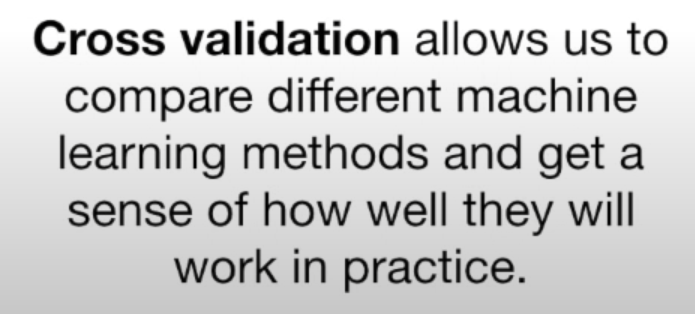

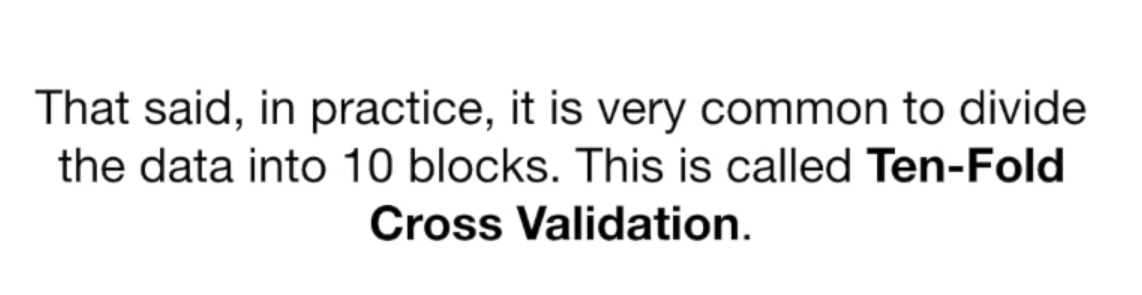

## Confusion matrix
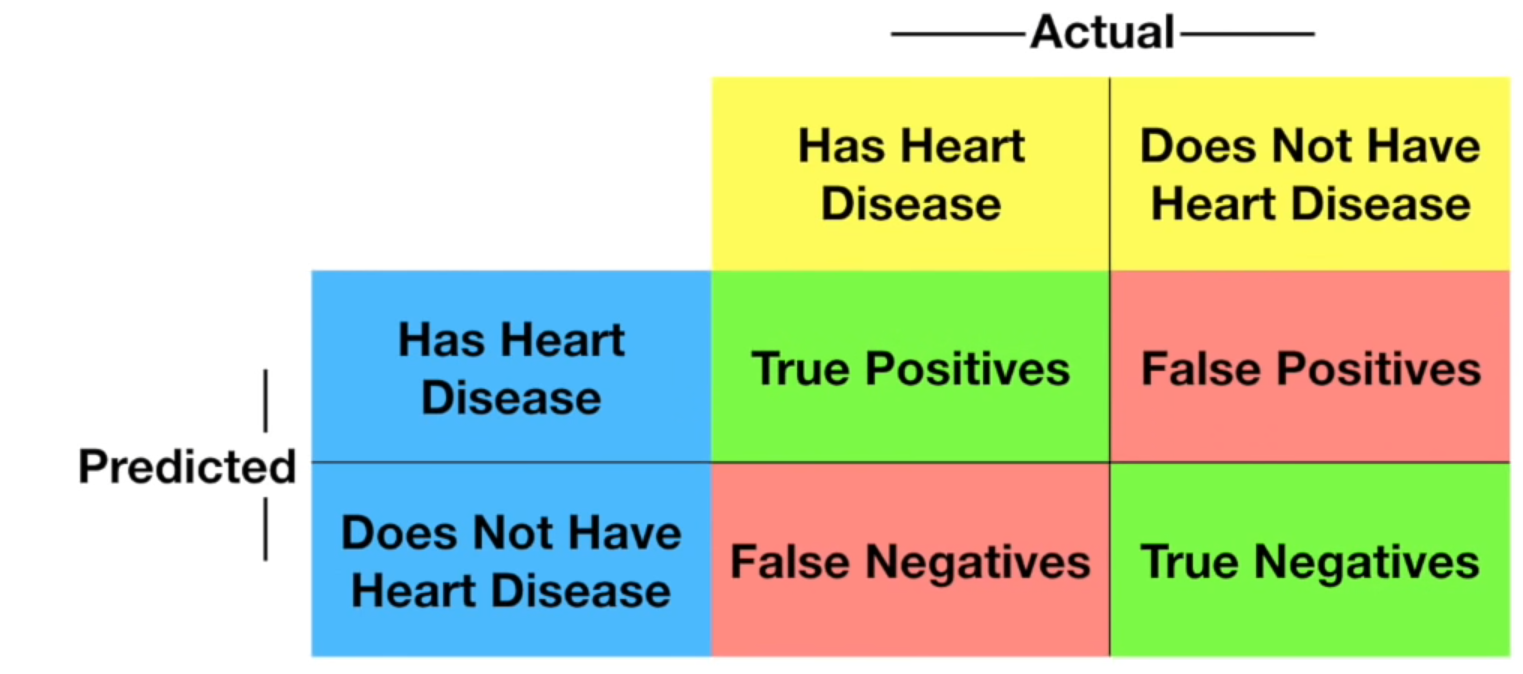
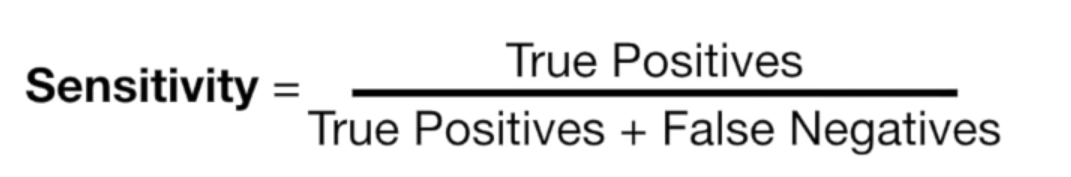
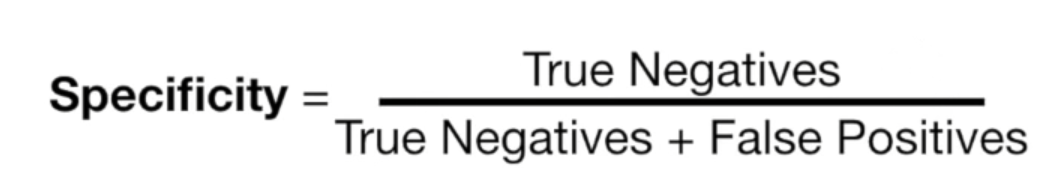

## ROC & AUC
Threshold 0.5
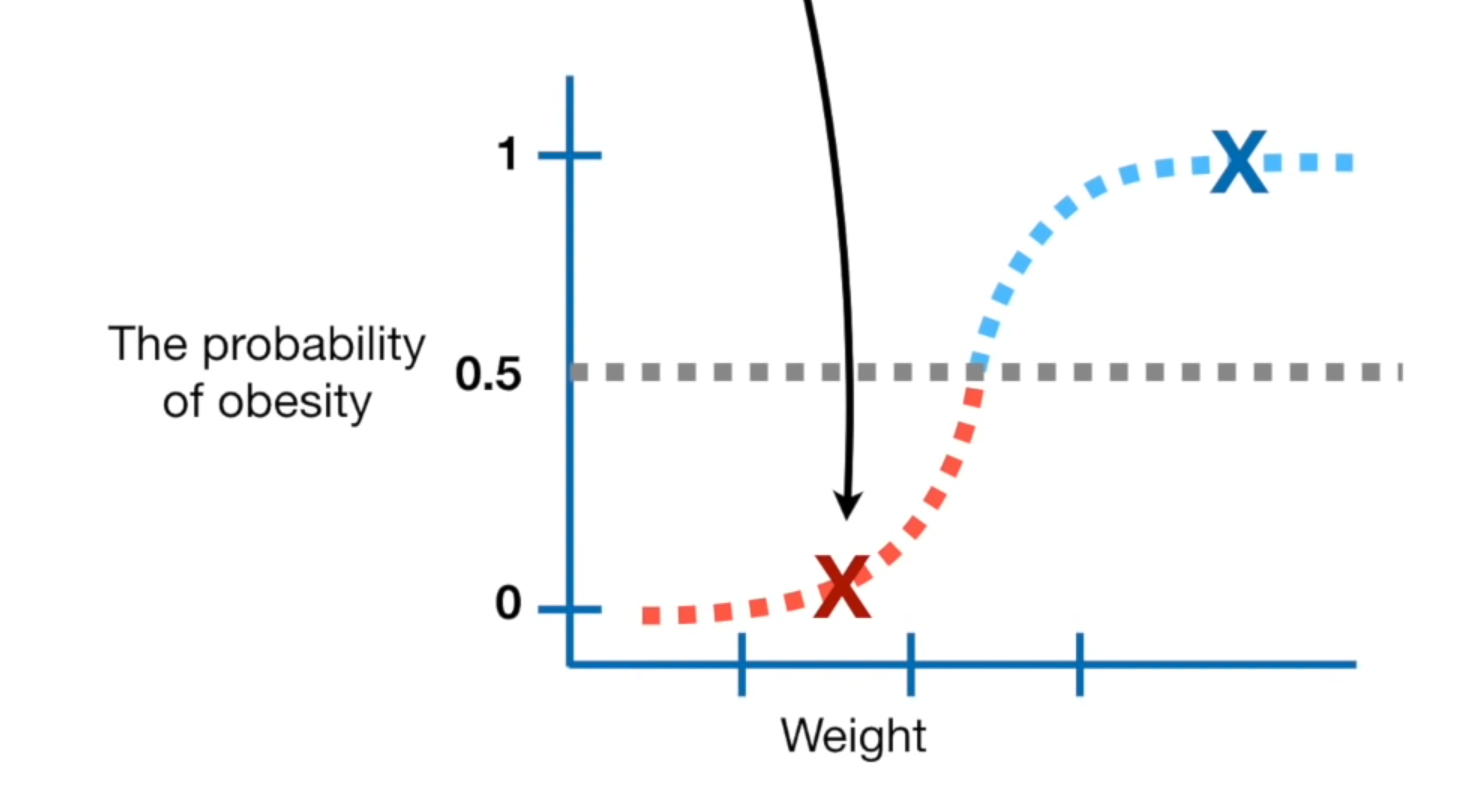
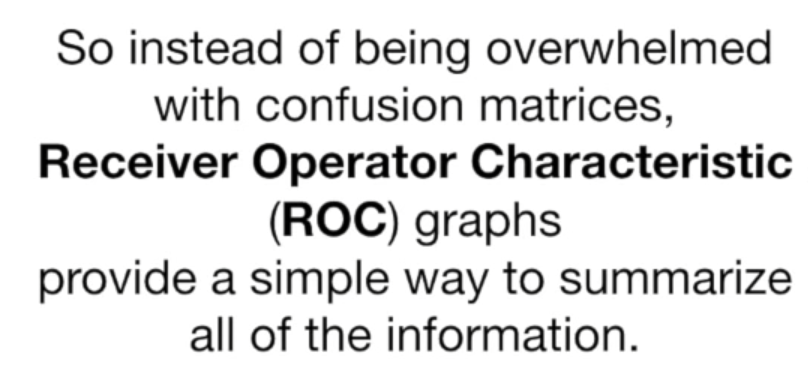
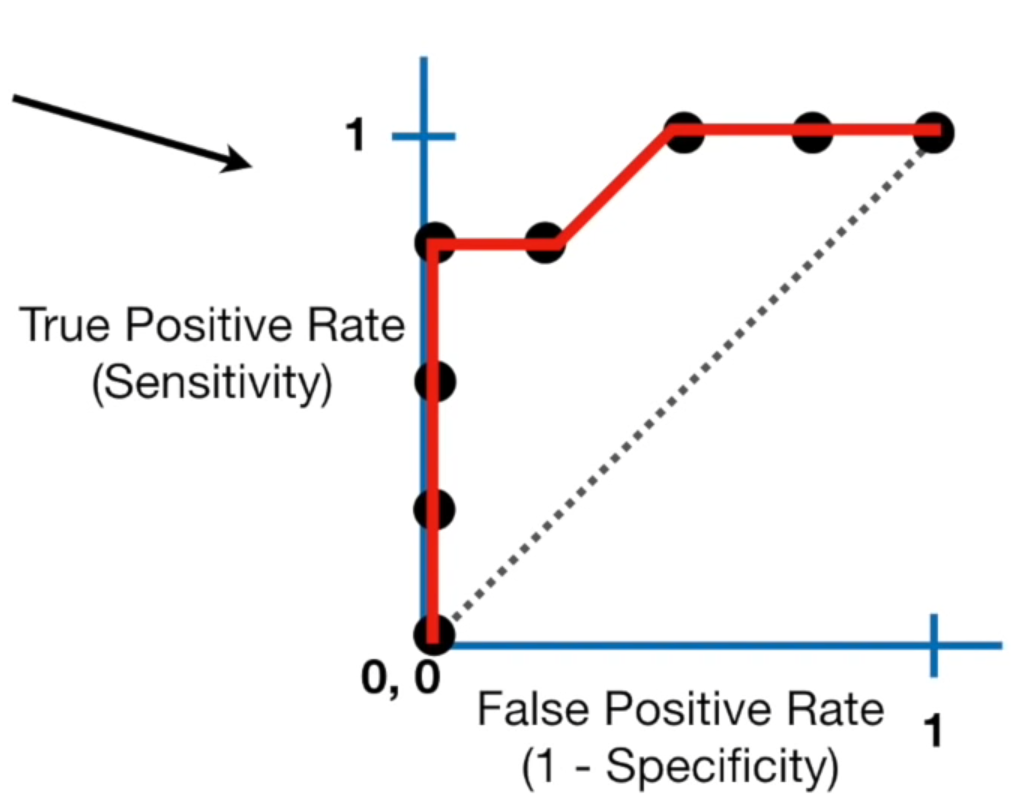
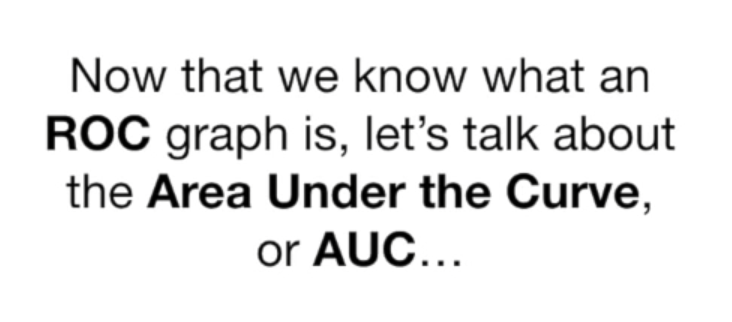
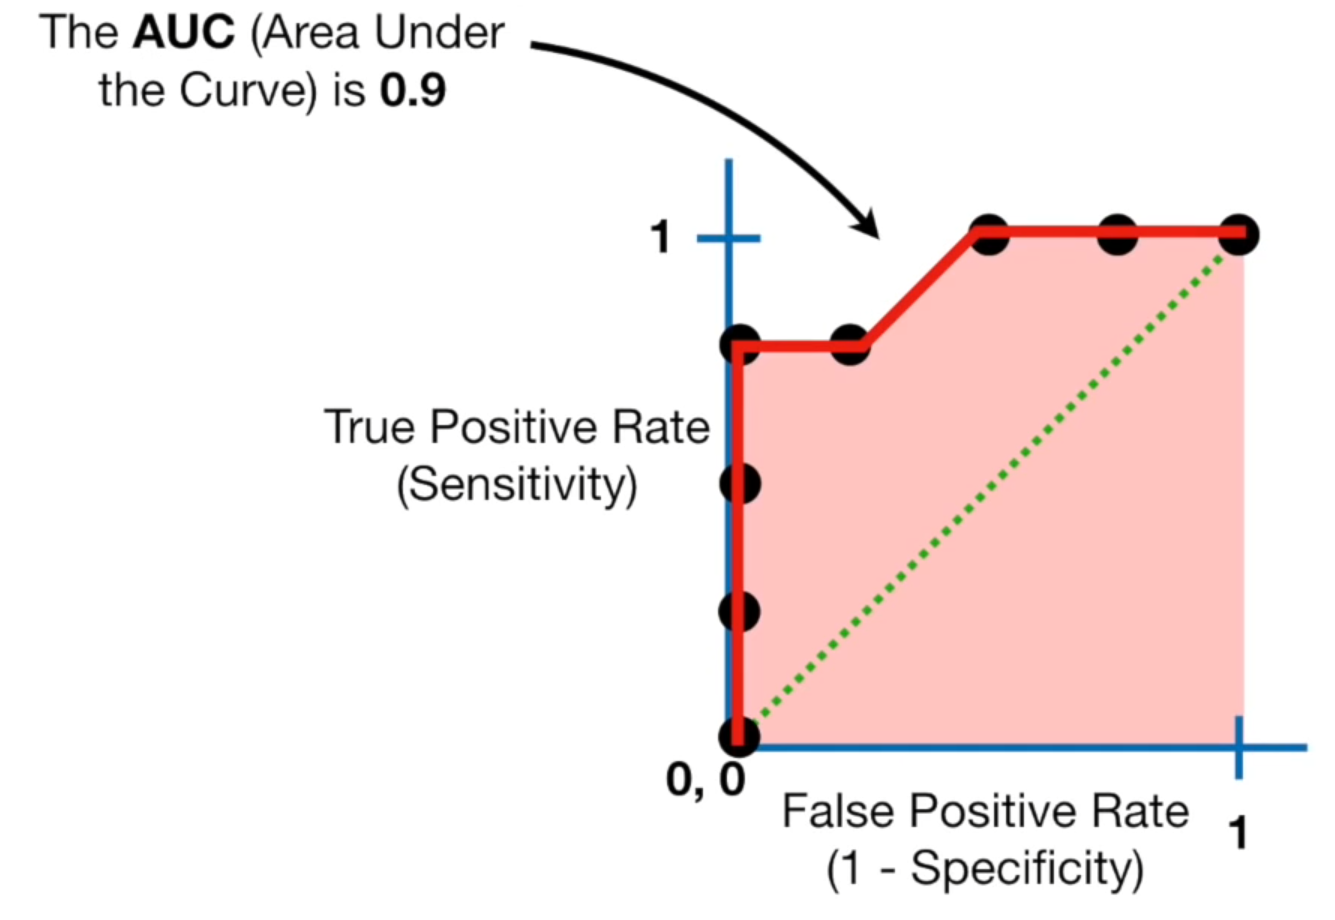
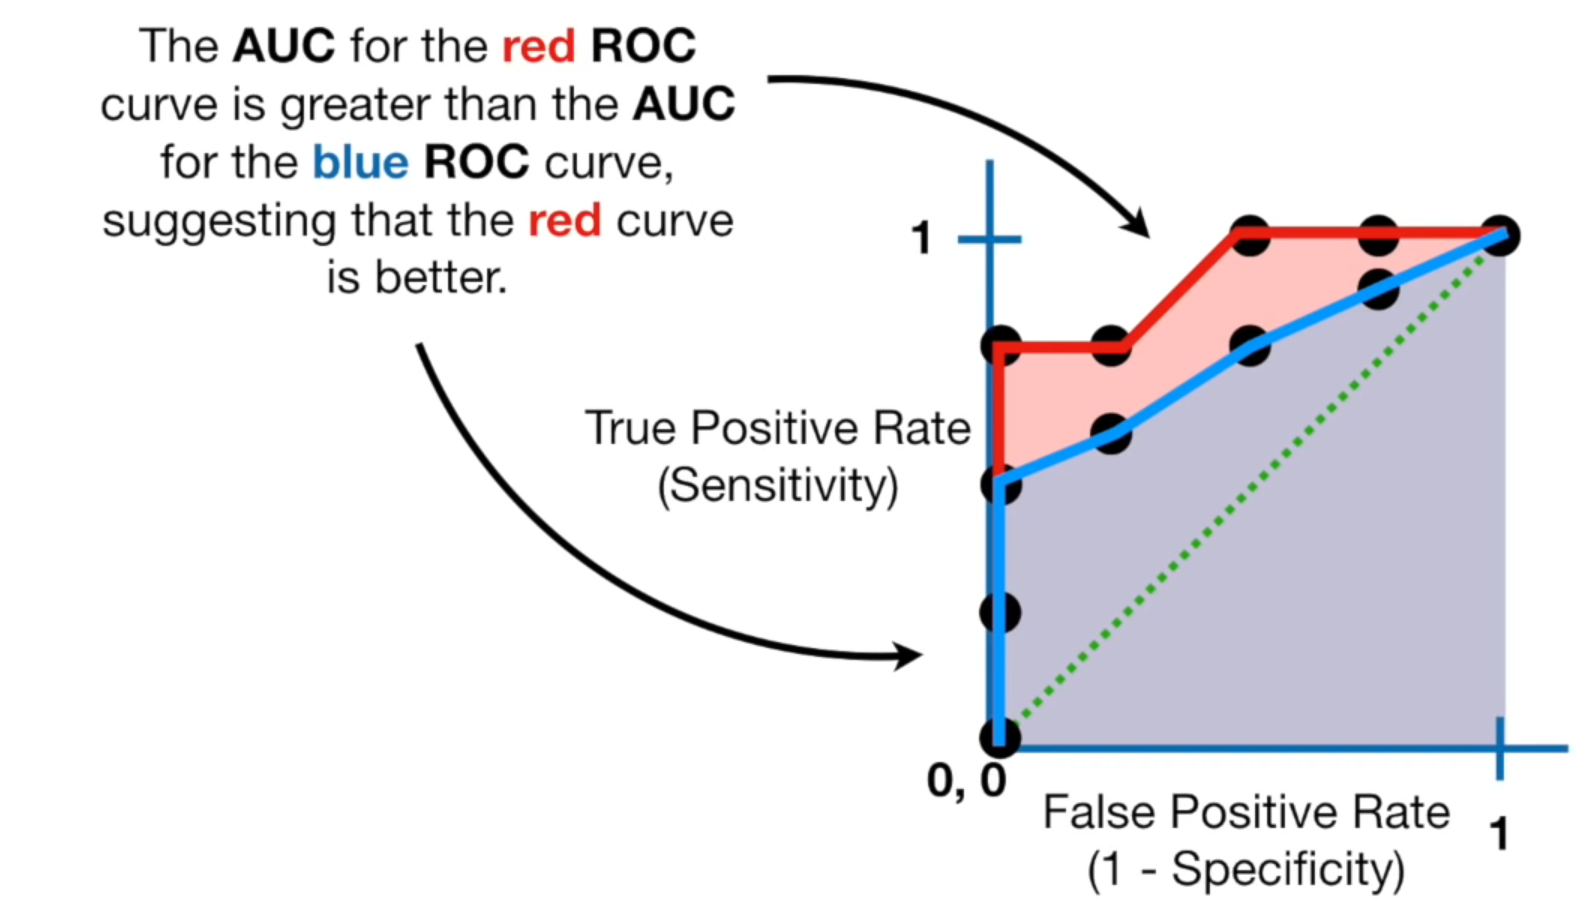

## Tree
previene overfit:
- min_split suele ser 20
- podar (prune) el arbol
- cross validation

### Cost Complexity Pruning
Se calcula el Sum of squared residual para cada árbol (uno más podado que el otro) = SSR

$ Tree Score = SSR + a*T $

$T$ number of leaves

$a$ hiperparámetro (se usó 10000)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [5]:
df = pd.read_csv('../data/processed.cleveland.data', header=None)

In [7]:
print(open('../data/heart-disease.names').read())

Publication Request: 
   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
   This file describes the contents of the heart-disease directory.

   This directory contains 4 databases concerning heart disease diagnosis.
   All attributes are numeric-valued.  The data was collected from the
   four following locations:

     1. Cleveland Clinic Foundation (cleveland.data)
     2. Hungarian Institute of Cardiology, Budapest (hungarian.data)
     3. V.A. Medical Center, Long Beach, CA (long-beach-va.data)
     4. University Hospital, Zurich, Switzerland (switzerland.data)

   Each database has the same instance format.  While the databases have 76
   raw attributes, only 14 of them are actually used.  Thus I've taken the
   liberty of making 2 copies of each database: one with all the attributes
   and 1 with the 14 attributes actually used in past experiments.

   The authors of the databases have requested:

      ...that any publications resulting from the use of th

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [40]:
df.columns = ['age', 'sex', 'cp',
              'restbp', 'chol', 'fbs',
              'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 
              'thal', 'hd']

In [41]:
df.head(50).T

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
age,63.0,67.0,67.0,37.0,41.0,56.0,62.0,57.0,63.0,53.0,...,65.0,40.0,71.0,59.0,61.0,58.0,51.0,50.0,65.0,53.0
sex,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
cp,1.0,4.0,4.0,3.0,2.0,2.0,4.0,4.0,4.0,4.0,...,4.0,1.0,2.0,3.0,4.0,3.0,3.0,4.0,3.0,3.0
restbp,145.0,160.0,120.0,130.0,130.0,120.0,140.0,120.0,130.0,140.0,...,150.0,140.0,160.0,150.0,130.0,112.0,110.0,150.0,140.0,130.0
chol,233.0,286.0,229.0,250.0,204.0,236.0,268.0,354.0,254.0,203.0,...,225.0,199.0,302.0,212.0,330.0,230.0,175.0,243.0,417.0,197.0
fbs,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
restecg,2.0,2.0,2.0,0.0,2.0,0.0,2.0,0.0,2.0,2.0,...,2.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,2.0,2.0
thalach,150.0,108.0,129.0,187.0,172.0,178.0,160.0,163.0,147.0,155.0,...,114.0,178.0,162.0,157.0,169.0,165.0,123.0,128.0,157.0,152.0
exang,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
oldpeak,2.3,1.5,2.6,3.5,1.4,0.8,3.6,0.6,1.4,3.1,...,1.0,1.4,0.4,1.6,0.0,2.5,0.6,2.6,0.8,1.2


In [12]:
df.shape

(303, 14)

In [42]:
df.describe()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,hd
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [23]:
df['thal'].value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

In [25]:
df['ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [43]:
df = df[df['ca'].ne('?') & df['thal'].ne('?')]

In [37]:
# df['ca'].replace('?', np.nan)

In [26]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [22]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
db           int64
dtype: object

In [44]:
X = df.drop('hd', axis=1).copy()
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [45]:
y = df['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

In [46]:
X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

In [52]:
pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'thal']).head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


You have to verify the rest (using unique and blah blah blah)

In [53]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [58]:
y.value_counts()

0    160
1    137
Name: hd, dtype: int64

In [56]:
y[y > 0] = 1 # Simplifico el modelo
y.value_counts()

0    160
1    137
Name: hd, dtype: int64

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

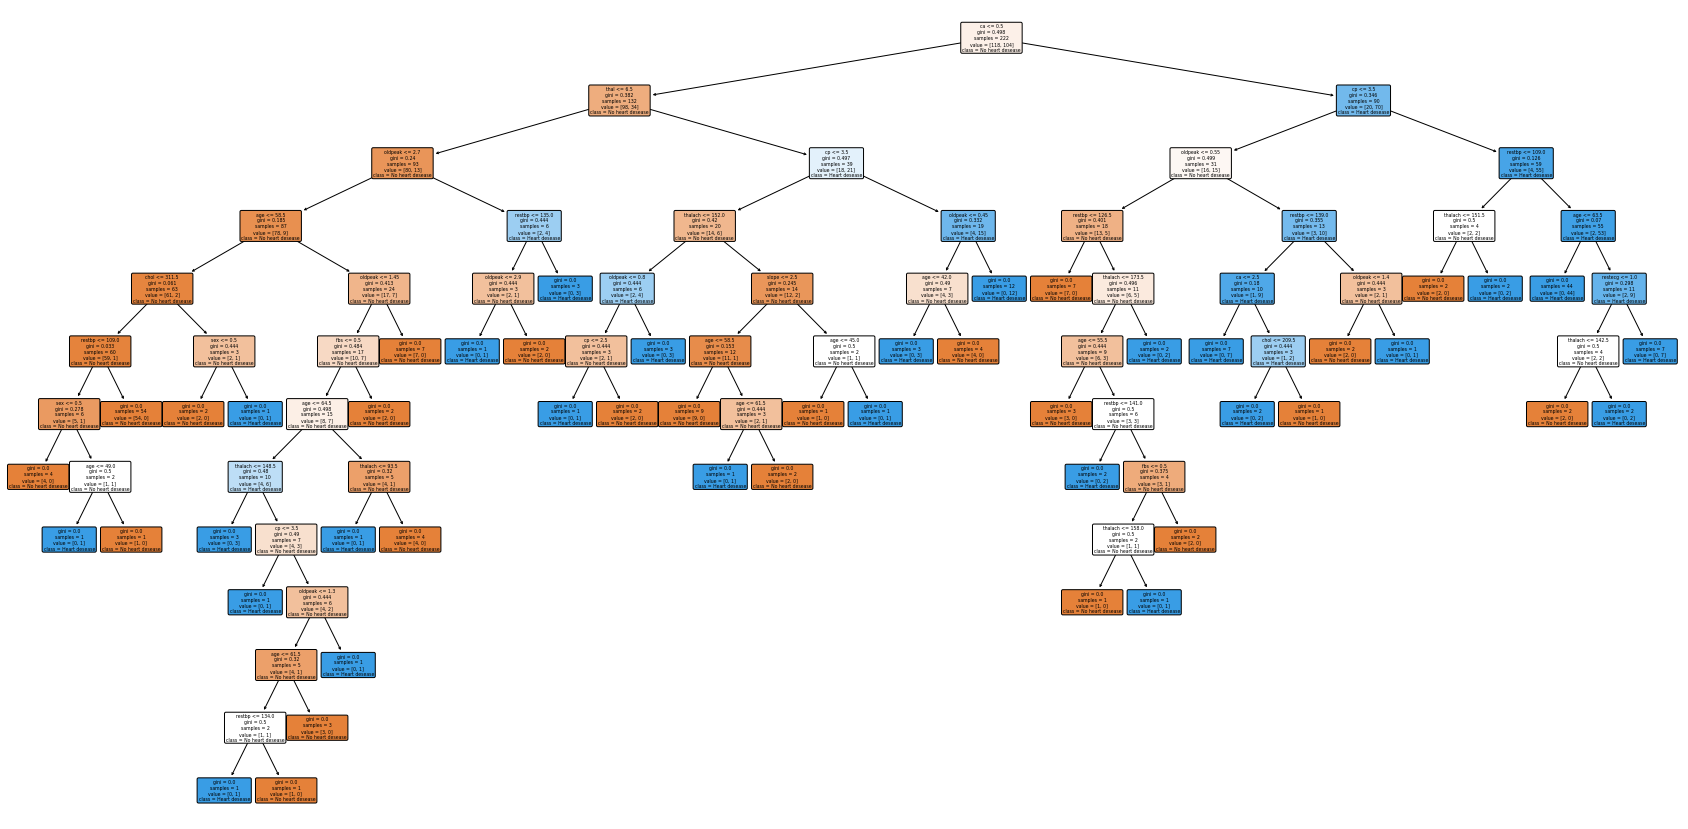

In [62]:
plt.figure(figsize=(30, 15))
_ = plot_tree(clf_dt, 
          filled=True,
          rounded=True,
          class_names=["No heart desease", "Heart desease"],
          feature_names=X.columns)

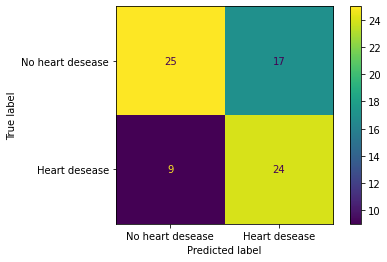

In [63]:
_ = plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["No heart desease", "Heart desease"])

In [66]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]
clf_dts = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

In [67]:
ccp_alphas

array([0.        , 0.00295295, 0.00337838, 0.0036036 , 0.003861  ,
       0.00405405, 0.0041184 , 0.00429358, 0.00541298, 0.00563063,
       0.00578761, 0.00600601, 0.00600601, 0.00600601, 0.00655201,
       0.00667591, 0.00757375, 0.00796251, 0.00811505, 0.01038181,
       0.0105777 , 0.01422475, 0.01604051, 0.01642461, 0.02103075,
       0.03680006, 0.03934523])

In [68]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]
train_scores

[1.0,
 0.9954954954954955,
 0.990990990990991,
 0.9864864864864865,
 0.9774774774774775,
 0.972972972972973,
 0.963963963963964,
 0.9594594594594594,
 0.9414414414414415,
 0.9324324324324325,
 0.9234234234234234,
 0.9009009009009009,
 0.9009009009009009,
 0.9009009009009009,
 0.8918918918918919,
 0.8873873873873874,
 0.8873873873873874,
 0.8873873873873874,
 0.8783783783783784,
 0.8693693693693694,
 0.8693693693693694,
 0.8513513513513513,
 0.8423423423423423,
 0.8108108108108109,
 0.7747747747747747,
 0.7702702702702703,
 0.7567567567567568]

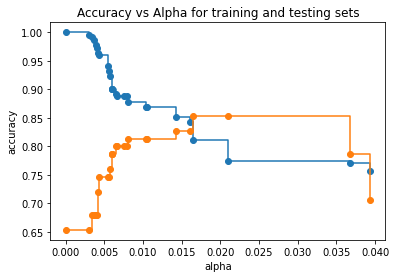

In [69]:
fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs Alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
print()

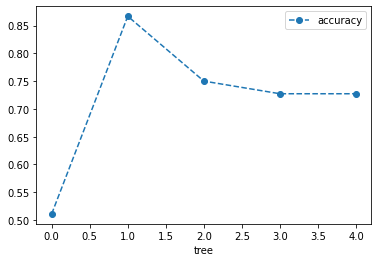

In [70]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)

scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data={
    'tree': range(5), 
    'accuracy': scores
})
_ = df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

Signature:
cross_val_score(
    estimator,
    X,
    y=None,
    *,
    groups=None,
    scoring=None,
    cv=None,
    n_jobs=None,
    verbose=0,
    fit_params=None,
    pre_dispatch='2*n_jobs',
    error_score=nan,
)
Docstring:
Evaluate a score by cross-validation

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
estimator : estimator object implementing 'fit'
    The object to use to fit the data.

X : array-like of shape (n_samples, n_features)
    The data to fit. Can be for example a list, or an array.

y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
    The target variable to try to predict in the case of
    supervised learning.

groups : array-like of shape (n_samples,), default=None
    Group labels for the samples used while splitting the dataset into
    train/test set. Only used in conjunction with a "Group" :term:`cv`
    instance (e.g., :class:`GroupKFold`).

scoring : str or callable, default=None


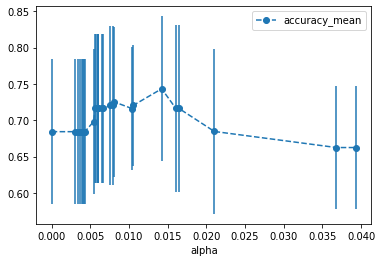

In [98]:
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append((ccp_alpha, np.mean(scores), np.std(scores)))

alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'accuracy_mean', 'accuracy_std'])
_ = alpha_results.plot(x='alpha', y='accuracy_mean', yerr='accuracy_std', marker='o', linestyle='--')

max_id = np.argmax(alpha_results['accuracy_mean'])
best_alpha = alpha_results['alpha'][max_id]

In [99]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.014224751066856332, random_state=42)

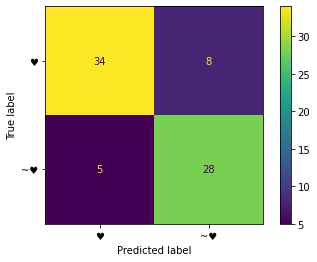

In [101]:
_ = plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=['♥', '~♥'])

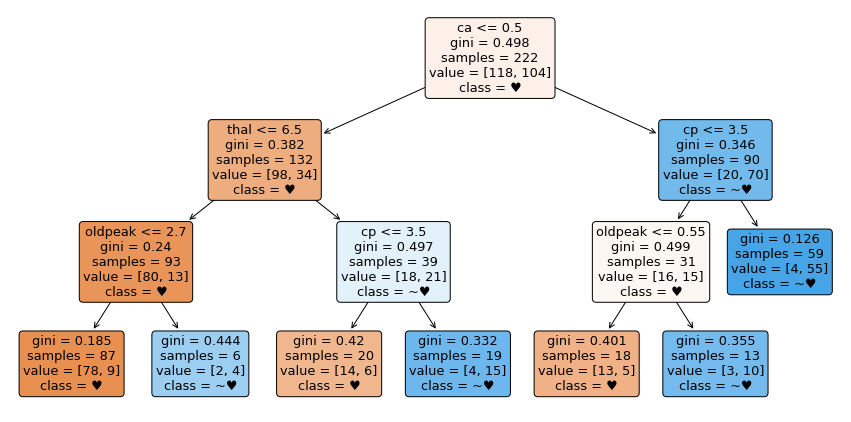

In [104]:
plt.figure(figsize=(15, 7.5))
_ = plot_tree(clf_dt, filled=True, rounded=True, class_names=['♥', '~♥'], feature_names=X.columns)

In [107]:
df = pd.read_csv('../data/Test_TP2_Datos_2020-2C.csv')
df.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Prod_Category_A
0,6140,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/5/2017,...,2019 - 5,Q2,2019,NaT,0,EUR,162240.0,EUR,367419.0,Prod_Category_A_None
1,6146,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/5/2017,...,2019 - 5,Q2,2019,NaT,0,EUR,78624.0,EUR,367419.0,Prod_Category_A_None
2,6151,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/5/2017,...,2019 - 5,Q2,2019,NaT,0,EUR,126555.0,EUR,367419.0,Prod_Category_A_None
3,6118,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/5/2017,...,2019 - 6,Q2,2019,NaT,1,EUR,243360.0,EUR,757783.5,Prod_Category_A_None
4,6124,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/5/2017,...,2019 - 6,Q2,2019,NaT,0,EUR,157248.0,EUR,757783.5,Prod_Category_A_None


In [111]:
len(df)

2551

In [114]:
prediction = pd.DataFrame(df['Opportunity_ID'].unique(), columns=['Opportunity_ID'])

In [119]:
prediction['Target'] = 1
prediction.head()

,Opportunity_ID,Stage,Target
0,10689,0,1
1,10690,0,1
2,10691,0,1
3,10692,0,1
4,10693,0,1


In [118]:
prediction.to_csv('../data/submit.csv', index=False)

## SVM Example

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm

digits = datasets.load_digits()

digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [2]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [34]:
digits.images.T.reshape(3, -1)

array([[ 0.,  0.,  0., ...,  2.,  3., 15.],
       [ 0.,  6.,  1., ...,  6., 15.,  4.],
       [ 5.,  9.,  9., ...,  0.,  0.,  0.]])

In [6]:
digits.target[0]

0

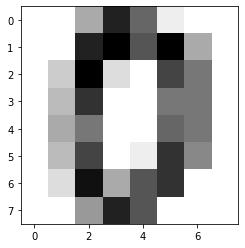

In [49]:
_ = plt.imshow(digits.images[0], cmap='binary', interpolation='nearest')

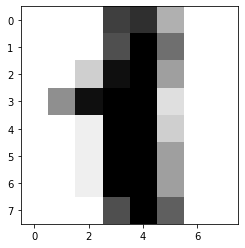

In [50]:
_ = plt.imshow(digits.images[1], cmap='binary', interpolation='nearest')

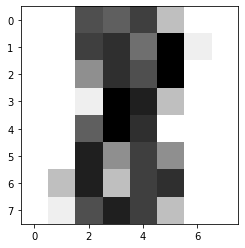

In [48]:
_ = plt.imshow(digits.images[40], cmap='binary', interpolation='nearest')

In [87]:
from sklearn.model_selection import GridSearchCV
"""
    ## first_iteration:

    - Param grid: 
        param_grid={
            'C': [1, 20, 50, 100, 500],
            'gamma': [1, 0.01, 0.001, 0.0001, 0.00005],
        }
    - Param used:
        C=1, gamma=0.001 ????
    
    ## second_iteration:
    - Param grid: 
        param_grid={
            'C': [80, 100, 120, 150, 200],
            'gamma': [0.0001, 0.00005, 0.000001, 0.0000005],
        }
    - Param used:
        C=80, gamma=0.0001
    
"""
clf = svm.SVC()
clf = GridSearchCV(estimator=clf,
                   param_grid={
            'C': [1, 20, 50, 100, 500],
            'gamma': [1, 0.01, 0.001, 0.0001, 0.00005],
        })

In [40]:
from sklearn.model_selection import train_test_split
data = digits.images.reshape((digits.images.shape[0], -1))
X_train, X_test, y_train, y_test = train_test_split(data, digits.target)


In [41]:
X_train

array([[ 0.,  0.,  3., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 15.,  1.,  0.],
       ...,
       [ 0.,  0.,  2., ..., 16.,  3.,  0.],
       [ 0.,  0.,  7., ..., 15.,  2.,  0.],
       [ 0.,  0.,  0., ..., 14.,  0.,  0.]])

In [88]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 20, 50, 100, 500],
                         'gamma': [1, 0.01, 0.001, 0.0001, 5e-05]})

In [89]:
(clf.best_estimator_)

SVC(C=1, gamma=0.001)

In [92]:
clf.best_params_

{'C': 1, 'gamma': 0.001}

In [90]:
from sklearn.metrics import accuracy_score
y_hat = clf.predict(X_test)
accuracy_score(y_hat, y_test)

0.9977777777777778

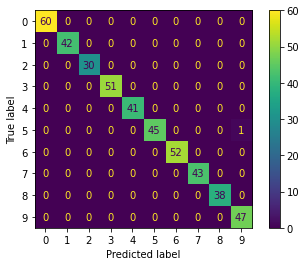

In [91]:
from sklearn.metrics import plot_confusion_matrix
_ = plot_confusion_matrix(clf, X_test, y_test)

In [58]:
def print_dict(data):
    for k, v in data.items():
        print(f'{k}: ')
        print(f'\t{v}')

In [61]:
from sklearn.model_selection import cross_val_score
from scipy import stats
scores = cross_val_score(clf, X_train, y_train, cv=5)
print_dict(stats.describe(scores)._asdict())

nobs: 
	5
minmax: 
	(0.9851301115241635, 1.0)
mean: 
	0.991827068704392
variance: 
	3.0413506096898258e-05
skewness: 
	0.3665764735441732
kurtosis: 
	-0.7862005539038548


In [65]:
from sklearn.model_selection import cross_validate
data = cross_validate(clf, X_train, y_train)
print_dict(data)
print()
print('Test score stats:')
print_dict(stats.describe(data['test_score'])._asdict())

fit_time: 
	[0.05199051 0.04999971 0.07398963 0.05800486 0.07400322]
score_time: 
	[0.026999   0.02901077 0.03399992 0.03099895 0.02699375]
test_score: 
	[1.         0.99259259 0.99256506 0.98513011 0.98884758]

Test score stats:
nobs: 
	5
minmax: 
	(0.9851301115241635, 1.0)
mean: 
	0.991827068704392
variance: 
	3.0413506096898258e-05
skewness: 
	0.3665764735441732
kurtosis: 
	-0.7862005539038548
